β₀ = [2.0, 1.0] = [2.0, 1.0]
σ₀² = 0.5 = 0.5
n = 50 = 50
β̂ = (A' * A) \ (A' * y) = [2.0238751934113215, 1.0947268625396762]
invAA = inv(A' * A) = [0.020211333920886483 0.0019847200931470883; 0.0019847200931470883 0.01863928815411349]
ŝ² = dot(y - ŷ, y - ŷ) / (n - 2) = 0.557245633875091


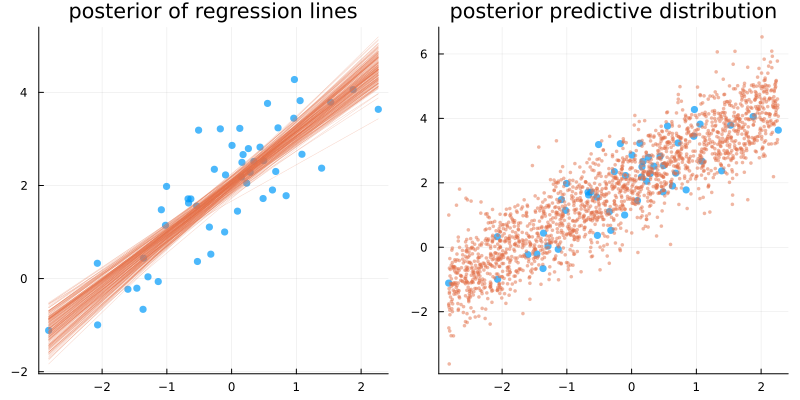

In [1]:
using Distributions
using LinearAlgebra
using Random
using StatsPlots
default(fmt=:png)

Random.seed!(4649373)

@show β₀ = [2.0, 1.0]
@show σ₀² = 0.5
@show n = 50
x = randn(n)
y = @. β₀[1] + β₀[2]*x + √σ₀²*randn()

A = x .^ (0:1)'
@show β̂ = (A'A)\A'y
@show invAA = inv(A'A)
ŷ = A*β̂
@show ŝ² = dot(y-ŷ, y-ŷ)/(n-2)

P = scatter(x, y; label="", msc=:auto, alpha=0.7)
for _ in 1:200
    σ² = rand(InverseGamma(n/2, (n-2)*ŝ²/2))
    β = rand(MvNormal(β̂, σ²*invAA))
    plot!(x -> β[1]+β[2]*x, extrema(x)...; label="", lw=0.5, alpha=0.3, c=2)
end
title!("posterior of regression lines")

Q = scatter(x, y; label="", msc=:auto, alpha=0.7)
for _ in 1:2000
    σ² = rand(InverseGamma(n/2, (n-2)*ŝ²/2))
    β = rand(MvNormal(β̂, σ²*invAA))
    xnew = rand(Uniform(extrema(x)...))
    ynew = β[1] + β[2]*xnew + √σ²*randn()
    scatter!([xnew], [ynew]; label="", msc=:auto, ms=2, alpha=0.5, c=2)
end
title!("posterior predictive distribution")

plot(P, Q; size=(800, 400))

In [ ]:
`